# Self-Driving Car Engineer Nanodegree


## Project: Advanced Lane Finding
---
The goal of this project is to create a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car. 

The steps of the project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.
 

### Camera Calibration

The following code calculates the camera matrix and distortion coefficients using the images in the *"camera_cal"* folder. It was adopted from original Udacity [source](https://github.com/udacity/CarND-Camera-Calibration)

First we are using OpenCV library to extract object points `objpoints` and image points `imgpoints` needed for camera calibration.

In [85]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
#%matplotlib qt
%matplotlib inline

# number of inside corners in x and y
nx = 9
ny = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:ny, 0:nx].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Keep filenames of image with not found corners to test camera calibration 
test_fnames = []
                 
# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    # Read a file
    img = cv2.imread(fname)
    # Covert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # get filename
    filename = fname.split('\\')[-1]
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        found_imgs.append(img)
        write_name = 'camera_cal/'+'corners_'+filename
        cv2.imwrite(write_name, img)
        #cv2.imshow('img', img)
        cv2.waitKey(500)
    else:
        test_fnames.append(fname)

#cv2.destroyAllWindows()

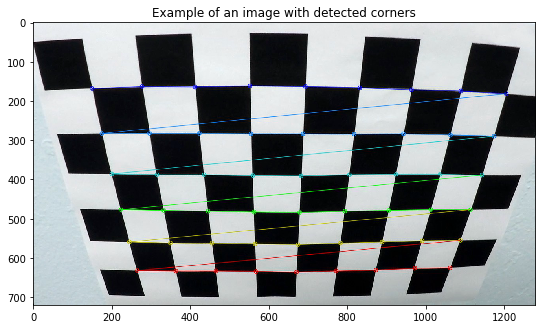

Number of images with detected corners = 17
Number of images with not detected corners = 3


In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('camera_cal/corners_calibration2.jpg')

fig = plt.figure(figsize = (9,6))
ax1 = fig.add_subplot(111)
ax1.imshow(img)
ax1.set_title("Example of an image with detected corners")
plt.show()
plt.close(fig)    # close the figure
print('Number of images with detected corners =', len(imgpoints))
print('Number of images with not detected corners =', len(not_found_imgs))

In 3 images the corners could not be detected because the number of cross points is not corresponding to the defined values of nx = 9 and ny = 6. I will use those images to test undistortion. 
Calibrate, calculate distortion coefficients, and test undistortion on an image. The camera calibration matrix and distortion coefficients are saved in file `dist_pickle.p`

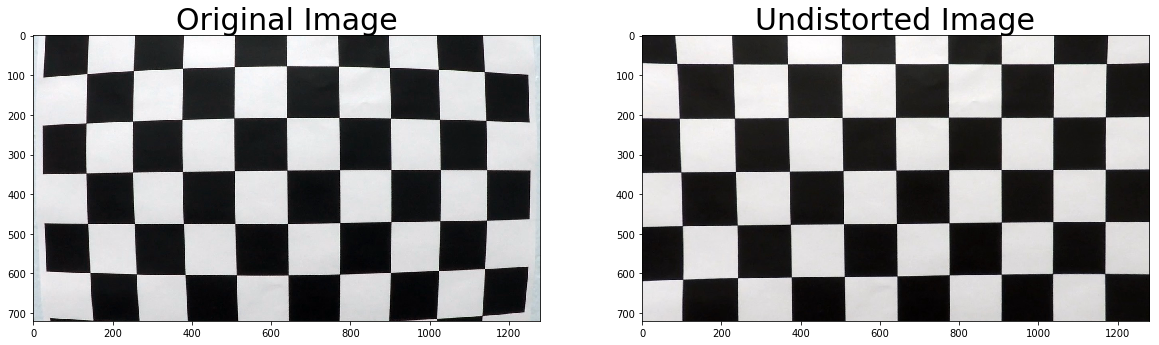

In [95]:
import pickle
%matplotlib inline

# Test undistortion on an image
img = cv2.imread(test_fnames[0])
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

# dst is the undistorted image 
dst = cv2.undistort(img, mtx, dist, None, mtx)

# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "camera_cal/dist_pickle.p", "wb" ) )
#dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

# Visualize undistortion
figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)
plt.show()
figure.savefig('output_images/test_calibration.jpg')   # save the figure to file
plt.close(figure)    # close the figure